#  National Parks Weather Data by Season

In [70]:
# Dependencies
import json
import requests
import pprint
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from api_keys import api_key

## Pull List of National Parks

In [2]:
second_url = 'https://developer.nps.gov/api/v1/activities/parks?'

query_second_url = second_url + "&api_key=" + api_key 

In [3]:
second_response = requests.get(query_second_url)

In [4]:
second_data = second_response.json()

In [5]:
second_response.status_code

200

In [6]:
# Get the articles from the response
# print(json.dumps(second_data, indent=4, sort_keys=True))

In [7]:
park_code_data = second_data.get('data',[])

In [8]:
parkCodes = []
parkNames = []
for park_categories in park_code_data:
    parks = park_categories['parks']
    for park in parks:
        designation = park['designation']
        if designation == 'National Park' and park['parkCode'] not in parkCodes:
            parkCodes.append(park['parkCode'])
            parkNames.append(park['fullName'])

In [9]:
# Create a DataFrame from the extracted data
nps_parks_df = pd.DataFrame({
    'park_code': parkCodes,
    'park_name': parkNames
})

# Display the DataFrame
nps_parks_df.head()

,park_code,park_name
0,acad,Acadia National Park
1,arch,Arches National Park
2,care,Capitol Reef National Park
3,cuva,Cuyahoga Valley National Park
4,glac,Glacier National Park


In [10]:
# Export park code and park name data

# Export DataFrame to a CSV file
nps_parks_df.to_csv('nps_park_codes.csv', index=False)
print("DataFrame exported to nps_park_codes_data.csv")

# # Export DataFrame to a JSON file
# nps_parks_df.to_json('nps_park_codes_data.json', orient='records')
# print("DataFrame exported to nps_park_codes_data.json")

DataFrame exported to nps_park_codes_data.csv


## Pull Lat/Long data for National Parks

In [11]:
#Insert park codes from the previous cell to get lat/long coordinates for all parks
flatten_park_data = []
url = "https://developer.nps.gov/api/v1/parks"
for code in parkCodes:
    apiParams = {
        "limit": 100000,
        "parkCode": code,
        "api_key": api_key
    }
    response = requests.get(url, params=apiParams)
    data = response.json()
    #print(response.request.url)
    #print(json.dumps(data, indent=4, sort_keys=True))
    nps_parks_data = data.get('data',[])
    for data in nps_parks_data:
        park_code = data.get('parkCode', 'N/A')
        latitude = data.get('latitude', 'N/A')
        longitude = data.get('longitude', 'N/A')
        weatherInfo = data.get('weatherInfo', 'N/A')

        flatten_park_data.append({
            'park_code': park_code,
            'park_latitude': latitude,
            'park_longitude': longitude,
            'weather_info': weatherInfo
        })

flatten_park_data  

[{'park_code': 'acad',
  'park_latitude': '44.409286',
  'park_longitude': '-68.247501',
  'weather_info': 'Located on Mount Desert Island in Maine, Acadia experiences all four seasons. Summer temperatures range from 45-90F (7-30C). Fall temperatures range from 30-70F (-1-21C). Typically the first frost is in mid-October and first snowfall begins in November and can continue through April with an average accumulation of 73 inches (185 cm). Winter temperatures range from 14-35F (-10 - 2C). Spring temperatures range from 30-70F (-1-21C).'},
 {'park_code': 'arch',
  'park_latitude': '38.72261844',
  'park_longitude': '-109.5863666',
  'weather_info': 'Arches is part of the Colorado Plateau, a "high desert" region that experiences wide temperature fluctuations, sometimes over 40 degrees in a single day. The temperate (and most popular) seasons are spring (April-May) and fall (mid-September-October), when daytime highs average 60 to 80 F and lows average 30 to 50 F. Summer temperatures ofte

## Pull Min/Max Temp Data for National Parks

In [12]:
#Insert lat/long data from the previous cell to get min/max temp for all seasons

dates = ['2023-03-20','2023-06-21','2023-09-23','2023-12-12']
flatten_weather_data = []

for park_data in flatten_park_data:
    minSummer=""
    maxSummer=""
    minWinter=""
    maxWinter=""
    minSpring=""
    maxSpring=""
    minFall=""
    maxFall=""
    weatherURL = "https://archive-api.open-meteo.com/v1/archive" 
    for date in dates:
        weatherParams = {
            "latitude": park_data['park_latitude'],
            "longitude": park_data['park_longitude'],
            "start_date": date,
            "end_date": date,
            "temperature_unit": "fahrenheit",
            "daily": "apparent_temperature_max,apparent_temperature_min"
        }
        response = requests.get(weatherURL, params=weatherParams)
        #print(response.request.url)
        #print(response.status_code)
        if(response.ok):
            data = response.json()
            #print(json.dumps(data, indent=4, sort_keys=True))
            weather_data = data.get('daily',[])
            #for data in weather_data:
            max = weather_data.get('apparent_temperature_max', 'N/A')[0]
            min = weather_data.get('apparent_temperature_min', 'N/A')[0]

            if date == '2023-03-20':
                minSpring = min
                maxSpring = max
            elif date == '2023-06-21':
                minSummer = min
                maxSummer = max
            elif date == '2023-09-23':
                minFall = min
                maxFall = max
            elif date == '2023-12-12':
                minWinter = min
                maxWinter = max
           
        else:
            print(park_data['park_code'])
            
    flatten_weather_data.append({
        'minSummer': minSummer,
        'maxSummer': maxSummer,
        'minWinter': minWinter,
        'maxWinter': maxWinter,
        'minSpring': minSpring,
        'maxSpring': maxSpring,
        'minFall': minFall,
        'maxFall': maxFall,
        'parkCode': park_data['park_code'],
        #'date': date
    })   
flatten_weather_data

[{'minSummer': 51.1,
  'maxSummer': 72.9,
  'minWinter': 17.6,
  'maxWinter': 29.2,
  'minSpring': 8.6,
  'maxSpring': 27.8,
  'minFall': 46.5,
  'maxFall': 62.2,
  'parkCode': 'acad'},
 {'minSummer': 56.4,
  'maxSummer': 82.8,
  'minWinter': 17.9,
  'maxWinter': 32.0,
  'minSpring': 29.8,
  'maxSpring': 40.0,
  'minFall': 44.4,
  'maxFall': 67.2,
  'parkCode': 'arch'},
 {'minSummer': 48.5,
  'maxSummer': 77.9,
  'minWinter': 18.3,
  'maxWinter': 31.4,
  'minSpring': 25.6,
  'maxSpring': 39.0,
  'minFall': 41.4,
  'maxFall': 65.6,
  'parkCode': 'care'},
 {'minSummer': 63.5,
  'maxSummer': 80.1,
  'minWinter': 17.0,
  'maxWinter': 35.6,
  'minSpring': 15.0,
  'maxSpring': 38.2,
  'minFall': 47.3,
  'maxFall': 70.9,
  'parkCode': 'cuva'},
 {'minSummer': 23.4,
  'maxSummer': 38.6,
  'minWinter': 12.3,
  'maxWinter': 17.7,
  'minSpring': 5.4,
  'maxSpring': 24.6,
  'minFall': 36.2,
  'maxFall': 41.5,
  'parkCode': 'glac'},
 {'minSummer': 48.9,
  'maxSummer': 73.3,
  'minWinter': 23.3,
  'm

In [19]:
# Create a DataFrame from the extracted data
nps_weather_df = pd.DataFrame.from_dict(flatten_weather_data).sort_values(by=['parkCode'])
# Display the DataFrame
nps_weather_df

,minSummer,maxSummer,minWinter,maxWinter,minSpring,maxSpring,minFall,maxFall,parkCode
0,51.1,72.9,17.6,29.2,8.6,27.8,46.5,62.2,acad
1,56.4,82.8,17.9,32.0,29.8,40.0,44.4,67.2,arch
18,56.2,79.2,18.0,25.9,12.5,41.4,46.9,60.8,badl
19,78.7,96.8,42.0,55.8,30.0,55.6,74.8,96.9,bibe
46,76.5,92.2,59.8,73.0,58.0,69.4,81.1,89.0,bisc
48,44.7,80.6,7.2,40.4,17.0,33.0,40.4,62.8,blca
20,39.4,62.0,14.1,29.5,15.3,21.0,40.2,50.6,brca
21,58.9,82.9,18.7,35.3,32.8,41.3,49.2,69.8,cany
2,48.5,77.9,18.3,31.4,25.6,39.0,41.4,65.6,care
22,70.3,90.8,34.1,44.5,28.7,48.4,65.4,83.2,cave


## Export the Data

In [14]:
# Export park code and park name data

# Export DataFrame to a CSV file
nps_weather_df.to_csv('nps_weather.csv', index=False)
print("DataFrame exported to nps_weather.csv")

# Export DataFrame to a JSON file
#nps_weather_df.to_json('nps_weather.json', orient='records')
#print("DataFrame exported to nps_geodata.json")

DataFrame exported to nps_weather.csv


## Visualize the data

In [21]:
nps_heatmap_df = nps_weather_df.copy()
nps_heatmap_df.head()

,minSummer,maxSummer,minWinter,maxWinter,minSpring,maxSpring,minFall,maxFall,parkCode
0,51.1,72.9,17.6,29.2,8.6,27.8,46.5,62.2,acad
1,56.4,82.8,17.9,32.0,29.8,40.0,44.4,67.2,arch
18,56.2,79.2,18.0,25.9,12.5,41.4,46.9,60.8,badl
19,78.7,96.8,42.0,55.8,30.0,55.6,74.8,96.9,bibe
46,76.5,92.2,59.8,73.0,58.0,69.4,81.1,89.0,bisc


In [25]:
nps_heatmap_df['Summer'] = nps_heatmap_df[['minSummer','maxSummer']].mean(axis=1)
nps_heatmap_df['Fall'] = nps_heatmap_df[['minFall','maxFall']].mean(axis=1)
nps_heatmap_df['Winter'] = nps_heatmap_df[['minWinter','maxWinter']].mean(axis=1)
nps_heatmap_df['Spring'] = nps_heatmap_df[['minSpring','maxSpring']].mean(axis=1)
nps_heatmap_df.head()

,minSummer,maxSummer,minWinter,maxWinter,minSpring,maxSpring,minFall,maxFall,parkCode,Summer,Fall,Winter,Spring
0,51.1,72.9,17.6,29.2,8.6,27.8,46.5,62.2,acad,62.00,54.35,23.40,18.20
1,56.4,82.8,17.9,32.0,29.8,40.0,44.4,67.2,arch,69.60,55.80,24.95,34.90
18,56.2,79.2,18.0,25.9,12.5,41.4,46.9,60.8,badl,67.70,53.85,21.95,26.95
19,78.7,96.8,42.0,55.8,30.0,55.6,74.8,96.9,bibe,87.75,85.85,48.90,42.80
46,76.5,92.2,59.8,73.0,58.0,69.4,81.1,89.0,bisc,84.35,85.05,66.40,63.70


In [29]:
nps_heatmap_ave_df = nps_heatmap_df[['parkCode','Winter', 'Spring', 'Fall', 'Summer']]
# nps_heatmap_ave_df.set_index('parkCode')
nps_heatmap_ave_df.head()

,parkCode,Winter,Spring,Fall,Summer
0,acad,23.40,18.20,54.35,62.00
1,arch,24.95,34.90,55.80,69.60
18,badl,21.95,26.95,53.85,67.70
19,bibe,48.90,42.80,85.85,87.75
46,bisc,66.40,63.70,85.05,84.35


In [30]:
merged_df = pd.merge(nps_heatmap_ave_df, nps_parks_df, left_on='parkCode', right_on='park_code', how='inner')
merged_df.head()

,parkCode,Winter,Spring,Fall,Summer,park_code,park_name
0,acad,23.40,18.20,54.35,62.00,acad,Acadia National Park
1,arch,24.95,34.90,55.80,69.60,arch,Arches National Park
2,badl,21.95,26.95,53.85,67.70,badl,Badlands National Park
3,bibe,48.90,42.80,85.85,87.75,bibe,Big Bend National Park
4,bisc,66.40,63.70,85.05,84.35,bisc,Biscayne National Park


In [53]:
df = merged_df[['park_name','Winter', 'Spring', 'Fall', 'Summer']]
df.set_index('park_name', inplace = True)
df.head()

,Winter,Spring,Fall,Summer
park_name,,,,
Acadia National Park,23.40,18.20,54.35,62.00
Arches National Park,24.95,34.90,55.80,69.60
Badlands National Park,21.95,26.95,53.85,67.70
Big Bend National Park,48.90,42.80,85.85,87.75
Biscayne National Park,66.40,63.70,85.05,84.35


In [57]:
# sns.heatmap(df, annot=True)

Text(20.7222222222222, 0.5, 'National Parks')

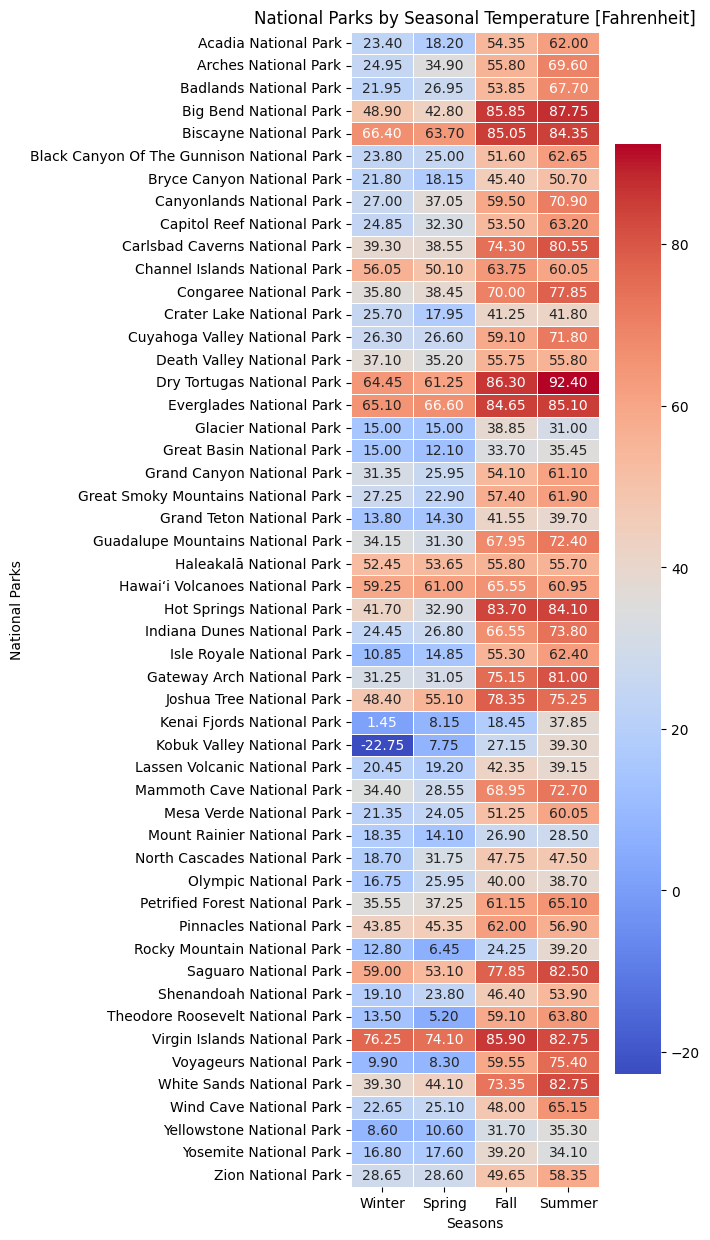

In [95]:
plt.figure(figsize=(4, 15))
svm = sns.heatmap(df, cmap='coolwarm', annot=True, fmt=".2f", linewidths=.5)
plt.title('National Parks by Seasonal Temperature [Fahrenheit]')
plt.xlabel('Seasons')
plt.ylabel('National Parks')

In [96]:
figure = svm.get_figure()    
figure.savefig('Images/svm_conf.png', dpi=300, bbox_inches='tight')

Text(20.7222222222222, 0.5, 'National Parks')

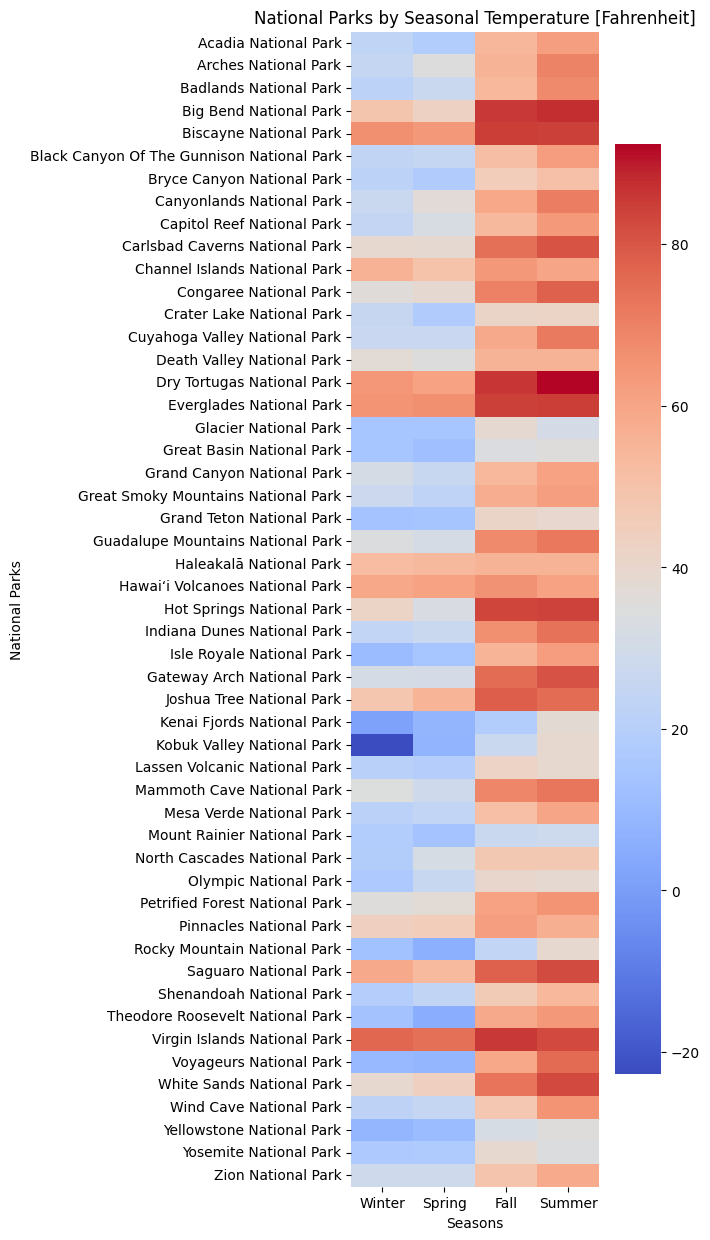

In [99]:
#Graph without annotations

plt.figure(figsize=(4, 15))
svm2 = sns.heatmap(df, cmap='coolwarm', annot=False)
plt.title('National Parks by Seasonal Temperature [Fahrenheit]')
plt.xlabel('Seasons')
plt.ylabel('National Parks')

In [102]:
figure2 = svm2.get_figure()    
figure2.savefig('Images/svm2_conf.png', dpi=300, bbox_inches='tight')